<a href="https://colab.research.google.com/github/Valdini/Titanic-Classifier/blob/main/Titanic_Survival_Pred_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('imports done')

imports done


**Creating dataframes from Titanic data**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Valdini/Titanic-Classifier/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Valdini/Titanic-Classifier/main/test.csv')
print('dataframes created')

dataframes created


**Data exploration**

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

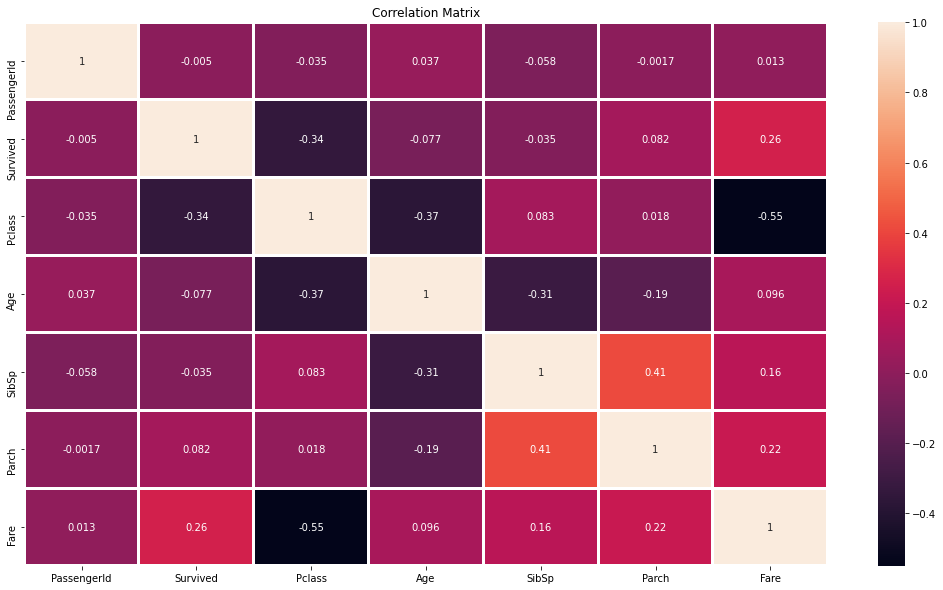

In [ ]:
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_train.corr(), linewidths=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test = df_test.fillna(method='bfill')
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            2
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          3
Embarked       0
dtype: int64

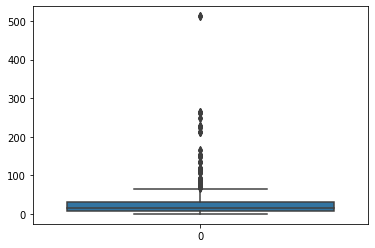

In [ ]:
sns.boxplot(data=df_train['Fare'])

In [ ]:
print(df_train['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


*Observations*: Fare (float64) and Pclass (int64) have by far the highest correlation with Survived (int64). We cannot yet reference correlation of Name, Sex, Cabin, Ticket and Embarked (all objects). I discard Age, PassengerId, SibSp, Parch and Embarked (lack of correlation with Survived), as well as Cabin (too many missing values), Name and Ticket.

*Dependent variable*: Survived (int64)

*Independent variables*: Fare (float64), Pclass (int64) and Sex (object)

**Data cleaning and processing**

*Tasks*: 

Fare (float64)
*   Replacing all Fare values > 200 with Mean
*   Normalizing Fare values

Sex (object)
*   Handle imbalanced genders
*   Labeld encoding

Pclass (int64)
*   Transforming Pclass to float64
*   Handle imbalanced class Pclass


*Algorithm tasks*:
*   Handle imbalanced classes: Survived







In [ ]:
df_train = df_train[['Survived','Fare','Sex','Pclass']]
df_test = df_test[['Fare','Sex','Pclass']]
df_train.head()

,Survived,Fare,Sex,Pclass
0,0,7.2500,male,3
1,1,71.2833,female,1
2,1,7.9250,female,3
3,1,53.1000,female,1
4,0,8.0500,male,3


*Sex*

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
Sex_majority = df_train[df_train.Sex=='male']
Sex_minority = df_train[df_train.Sex=='female']
 
# Upsample minority class
Sex_minority_upsampled = resample(Sex_minority, replace=True, n_samples=577, random_state=123) 
 
# Combine majority class with upsampled minority class
df_train = pd.concat([Sex_majority, Sex_minority_upsampled])
 
# Display new class counts
df_train.Sex.value_counts()

female    577
male      577
Name: Sex, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['Sex'] = labelencoder.fit_transform(df_train['Sex'])
df_train.Sex = df_train['Sex'].astype(float) 
df_train.Sex.head()

0    1.0
4    1.0
5    1.0
6    1.0
7    1.0
Name: Sex, dtype: float64

In [ ]:
df_test['Sex'] = labelencoder.fit_transform(df_test['Sex'])
df_test.Sex = df_test['Sex'].astype(float) 

*Pclass*

In [ ]:
Pclass_majority = df_train[df_train.Pclass==3]
Pclass_minority1 = df_train[df_train.Pclass==1]
Pclass_minority2 = df_train[df_train.Pclass==2]
Pclass_minority_upsampled1 = resample(Pclass_minority1, replace=True, n_samples=491, random_state=123)
Pclass_minority_upsampled2 = resample(Pclass_minority2, replace=True, n_samples=491, random_state=123) 
df_train = pd.concat([Pclass_majority, Pclass_minority_upsampled1, Pclass_minority_upsampled2])
df_train.Pclass.value_counts()

3    593
2    491
1    491
Name: Pclass, dtype: int64

In [ ]:
def floatizer(variable):
  variable = variable.astype(float)
  print(variable.dtype)
floatizer(df_train.Pclass)
floatizer(df_test.Pclass)

float64
float64


*Fare*

In [ ]:
df_train.Fare[df_train.Fare > 200] = df_train.Fare.mean()
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_train[['Fare']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_train.Fare = pd.DataFrame(x_scaled)
df_train.Fare.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     0.043975
4     0.048827
5     0.189699
7     0.043823
12    0.048827
Name: Fare, dtype: float64

In [ ]:
df_train.dtypes

Survived      int64
Fare        float64
Sex         float64
Pclass        int64
dtype: object

In [ ]:
df_train.head()

,Survived,Fare,Sex,Pclass
0,0,0.043975,1.0,3
4,0,0.048827,1.0,3
5,0,0.189699,1.0,3
7,0,0.043823,1.0,3
12,0,0.048827,1.0,3


**Model setup**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
df_train = shuffle(df_train)
x = df_train.iloc[:,1:]
y = df_train.Survived
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
x_train.head()

,Fare,Sex,Pclass
588,0.133593,1.0,3
594,0.345734,1.0,2
706,0.456429,0.0,2
862,0.252977,0.0,1
402,0.135614,0.0,3


**Training the model - XGBClassifier**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
xgb_model = XGBClassifier(booster='gbtree', n_estimators = 10000, learning_rate = 0.01, min_split_loss =0, reg_alpha=0, scale_pos_weight=1, subsample=1, max_depth=15, gamma=0)
xgb_model.fit(x_train, y_train, eval_set = [(x_test, y_test)],early_stopping_rounds = 10, verbose = False)
xgb_predictions = xgb_model.predict(x_test, ntree_limit=xgb_model.best_ntree_limit)
xgb_predictions = xgb_predictions.round()

**Model evaluation**

In [ ]:
accuracy  = accuracy_score(y_test, xgb_predictions)
print ("Accuracy of XGBoost: %.2f%%" %(accuracy*100))
xgb_predictions = np.asarray(xgb_predictions, dtype = int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xgb_predictions)
print(cm)
from sklearn.metrics import roc_auc_score
cap = roc_auc_score(y_test, xgb_predictions, average='macro', sample_weight=None)
print('AUC Score:', cap)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, xgb_predictions, average='weighted')
print('f1 Score is:', f1)

Accuracy of XGBoost: 82.91%
[[59 12]
 [15 72]]
AUC Score: 0.8292860611947547
f1 Score is: 0.82938271037699


**Model optimization**

In [ ]:
'''
#with GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters = [{'booster': ['gbtree', 'gblinear'],'learning_rate': [0.1,0.3,0.5],'min_split_loss': [0,1,10]}]
grid_search = GridSearchCV(estimator = xgb_model, param_grid = parameters)
grid_search.fit(x_train, y_train)
print("Best Grid CV Score:", grid_search.best_score_)
print("Best Grid CV Params:", grid_search.best_params_)
'''

'\n#with GridSearchCV for hyperparameter tuning\nfrom sklearn.model_selection import GridSearchCV\nparameters = [{\'booster\': [\'gbtree\', \'gblinear\'],\'learning_rate\': [0.1,0.3,0.5],\'min_split_loss\': [0,1,10]}]\ngrid_search = GridSearchCV(estimator = xgb_model, param_grid = parameters)\ngrid_search.fit(x_train, y_train)\nprint("Best Grid CV Score:", grid_search.best_score_)\nprint("Best Grid CV Params:", grid_search.best_params_)\n'

**Model alternative - Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 300,bootstrap='True',criterion='gini',min_samples_leaf=1,min_samples_split=2)
rfc.fit(x_train, y_train)
rfc_predictions = rfc.predict(x_test)

**Evaluation of alternative model**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
accuracy  = accuracy_score(y_test, rfc_predictions)
print ("Accuracy of Random Forest: %.2f%%" %(accuracy*100) )

Accuracy of Random Forest: 87.97%


**Optimization of alternative model**

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini', 'entropy'], 'min_samples_split': [2,4], 
               'min_samples_leaf': [1,3], 'bootstrap': ['True','False']}]
grid_search = GridSearchCV(estimator = rfc, param_grid = parameters)
grid_search.fit(x_train, y_train)
print("Best Grid CV Score:", grid_search.best_score_)
print("Best Grid CV Params:", grid_search.best_params_)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nparameters = [{\'criterion\': [\'gini\', \'entropy\'], \'min_samples_split\': [2,4], \n               \'min_samples_leaf\': [1,3], \'bootstrap\': [\'True\',\'False\']}]\ngrid_search = GridSearchCV(estimator = rfc, param_grid = parameters)\ngrid_search.fit(x_train, y_train)\nprint("Best Grid CV Score:", grid_search.best_score_)\nprint("Best Grid CV Params:", grid_search.best_params_)\n'

**Predicting test data with trained model and writing results to CSV that is then saved on Google Drive**

In [ ]:
#uploading to Google Drive for further use
!pip install -U -q PyDrive
import scipy.sparse as sparse
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from google.colab import auth, files
from oauth2client.client import GoogleCredentials
model = xgb_model
model.fit(x_train,y_train)
output = model.predict(df_test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('https://raw.githubusercontent.com/Valdini/Titanic-Prediction-Regression-/master/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId', 'Survived']].to_csv('./valentin_submission.csv', index=False)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
uploaded = drive.CreateFile({'title': 'valentin_submission.csv'})
uploaded.SetContentFile('valentin_submission.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1lh62lY_3FTcbNa_7zEoTykSNebNv9W0G
